<a href="https://colab.research.google.com/github/gopesh-code/Coursera-Courses-Review-System/blob/main/Team_12_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING & LOADING THE DATASETS FROM KAGGLE**

In [1]:
 !pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [105]:
import os
os.chdir("/content/gdrive/My Drive")
!ls

 20BCE0665_MGT1022_Assign_1.gdoc
 20BCE2870_CSE1007_Cycle_Sheet_3.gdoc
'20BCE2870_Final Certificate (1).pdf'
'20BCE2870_Final Certificate.pdf'
 20BCE2870_JAVA_DA_1.gdoc
 20BCE2870_LAB_DA_5.gdoc
 20BCE2870_MAT3004_TH_DA.gdoc
 20BCE2870_NLP_TH_DA.docx
'Aadhar Gopesh.pdf'
'AI Project - Team 9 Final Report.docx'
'AI Project - Team 9.gdoc'
'AI Review 1.gdoc'
'Ankur Joshi.gform'
 bird.jpg
 CaffeineOverflow.pdf
 Certificates
'Ch 26 s 2 assessment .gdoc'
 Classroom
'Colab Notebooks'
'Copy of LIVE_Schedule Maker from NirAndFar.com.gsheet'
'Copy of Team 9, Review 1, Ad-Hoc.gslides'
 courseraa.jpg
'Coursera Reviews'
 DA1MGT1022_20BCE2870.gdoc
 DA2MGT1022_20BCE2870.gdoc
 DA4MGT1022_20BCE2870.gdoc
 Database.gsheet
'DBMS TH DA.docx'
 Designs
 Designs.pdf
 Disruptor.gdoc
'DOC for Review 1.gdoc'
'EnrolledListReport - Fall 2021-22 (1).gsheet'
 Features.gdoc
'Four Factor Authentication'
'Gopesh ISAA LAB.gdoc'
'Gopesh Lab IWP Task 1.gdoc'
'Gopesh Lab IWP Task 2.gdoc'
'Gopesh Lab IWP Task 3.gdoc'
'Gopesh 

In [4]:
!kaggle datasets download -d imuhammad/course-reviews-on-coursera

 75% 25.0M/33.1M [00:00<00:00, 125MB/s] 
100% 33.1M/33.1M [00:00<00:00, 130MB/s]


In [5]:
!unzip \*.zip && rm *.zip

Archive:  course-reviews-on-coursera.zip
  inflating: Coursera_courses.csv    
  inflating: Coursera_reviews.csv    


In [6]:
!kaggle datasets download -d gopeshkumarpathak/courses-review-coursera

 30% 5.00M/16.4M [00:00<00:00, 51.7MB/s]
100% 16.4M/16.4M [00:00<00:00, 86.9MB/s]


In [7]:
!unzip \*.zip && rm *.zip

Archive:  courses-review-coursera.zip
  inflating: SurveySchema.csv        
  inflating: freeFormResponses.csv   
  inflating: multipleChoiceResponses.csv  
  inflating: reviews.csv             
  inflating: reviews_by_course.csv   


**PROJECT**

In [8]:
import numpy as np
import pandas as pd
import matplotlib as pt
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# reading the data
reviewbycourse = pd.read_csv("/content/reviews_by_course.csv")
review = pd.read_csv("/content/reviews.csv")
survey = pd.read_csv("/content/SurveySchema.csv")
response = pd.read_csv("/content/freeFormResponses.csv")
mcresponse = pd.read_csv("/content/multipleChoiceResponses.csv")

# getting the shape
print("Shape of reviews", reviewbycourse.shape)
print("Shape of reviews", review.shape)
print("Shape of reviews", survey.shape)
print("Shape of response", response.shape)
print("Shape of multiple choice respnse", mcresponse.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of reviews (140320, 3)
Shape of reviews (107018, 3)
Shape of reviews (12, 52)
Shape of response (23860, 35)
Shape of multiple choice respnse (23860, 395)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
reviewbycourse.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


In [11]:
data1 = pd.read_csv("/content/Coursera_courses.csv")
data2 = pd.read_csv("/content/Coursera_reviews.csv")

In [12]:
data1.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [13]:
data2.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [14]:
final = pd.merge(data1, data2, on='course_id', how='inner')

In [15]:
final.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1


In [16]:
list(final.columns.values)

['name',
 'institution',
 'course_url',
 'course_id',
 'reviews',
 'reviewers',
 'date_reviews',
 'rating']

In [17]:
!kaggle datasets download -d trajput508/coursera-data

  0% 0.00/2.77M [00:00<?, ?B/s]
100% 2.77M/2.77M [00:00<00:00, 188MB/s]


In [18]:
!unzip coursera-data

Archive:  coursera-data.zip
replace Coursera_courses.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Coursera_courses.csv    


In [19]:
data3 = pd.read_csv("/content/Coursera_courses.csv")

In [20]:
data3.head()

,Unnamed: 0,course_name,university_name,course_type,duration,course_language,course_rating,course_level,instructor,course_detail
0,0,Approve Social Media Posts with Zapier and Tr...,Coursera Project Network,Split-screen video,2 hours,English,4.5stars,Beginner,"Carmen Rojas,",The process that marketing and communications ...
1,1,Aprendizaje automático sin código: Azure ML D...,Coursera Project Network,Split-screen video,2 horas,Spanish,4.8stars,Intermediate,"Leire Ahedo,",Este proyecto es un curso práctico y efectivo ...
2,2,Atención prehospitalaria del ictus agudo y se...,Universitat de Barcelona,100% online,Approx. 14 hours to complete,Spanish,4.9stars,Intermediate Level,"Montse Gorchs Molist,Natalia Perez de la Ossa,...",El ictus es una emergencia médica tiempo depen...
3,3,Automate Blog Advertisements with Zapier,Coursera Project Network,Split-screen video,2 hours,English,4.2stars,Intermediate,"Carmen Rojas,",Zapier is the industry leader in task automati...
4,4,Bases de Datos NoSQL en Azure,Coursera Project Network,Split-screen video,2 horas,Spanish,3.7stars,Beginner,"Leire Ahedo,",Este proyecto es un curso práctico y efectivo ...


In [21]:
data3.rename(columns = {'course_name':'name'}, inplace = True)

In [22]:
data3.head()

,Unnamed: 0,name,university_name,course_type,duration,course_language,course_rating,course_level,instructor,course_detail
0,0,Approve Social Media Posts with Zapier and Tr...,Coursera Project Network,Split-screen video,2 hours,English,4.5stars,Beginner,"Carmen Rojas,",The process that marketing and communications ...
1,1,Aprendizaje automático sin código: Azure ML D...,Coursera Project Network,Split-screen video,2 horas,Spanish,4.8stars,Intermediate,"Leire Ahedo,",Este proyecto es un curso práctico y efectivo ...
2,2,Atención prehospitalaria del ictus agudo y se...,Universitat de Barcelona,100% online,Approx. 14 hours to complete,Spanish,4.9stars,Intermediate Level,"Montse Gorchs Molist,Natalia Perez de la Ossa,...",El ictus es una emergencia médica tiempo depen...
3,3,Automate Blog Advertisements with Zapier,Coursera Project Network,Split-screen video,2 hours,English,4.2stars,Intermediate,"Carmen Rojas,",Zapier is the industry leader in task automati...
4,4,Bases de Datos NoSQL en Azure,Coursera Project Network,Split-screen video,2 horas,Spanish,3.7stars,Beginner,"Leire Ahedo,",Este proyecto es un curso práctico y efectivo ...


  _________________________________________

**MERGING THE DATASETS TOGETHER**

In [23]:
FINAL = pd.merge(final, data3, on='name', how='inner')

In [24]:
FINAL.head() 

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,Unnamed: 0,university_name,course_type,duration,course_language,course_rating,course_level,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1,3949,Stanford University,100% online,Approx. 60 hours to complete,English,4.9stars,Approx. 60 hours to complete,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


In [25]:
# dropping the unnecessary columns
FINAL.drop('university_name',axis=1,inplace=True)
FINAL.drop('Unnamed: 0',axis=1,inplace=True)
FINAL.drop('course_level',axis=1,inplace=True)

In [26]:
FINAL.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_type,duration,course_language,course_rating,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


In [27]:
Final_copy = FINAL.copy()

**VISUALIZATION**

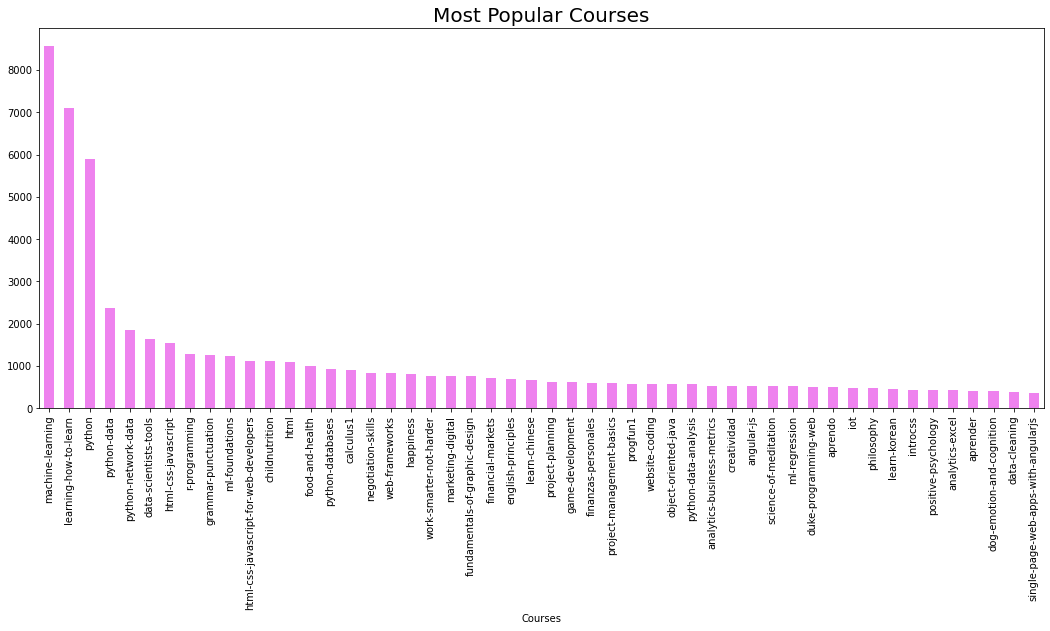

In [28]:
# looking at the most popular courses

plt.rcParams['figure.figsize'] = (18, 7)
reviewbycourse['CourseId'].value_counts().head(50).plot.bar(color = 'violet')
plt.title('Most Popular Courses', fontsize = 20)
plt.xlabel('Courses')
plt.show()

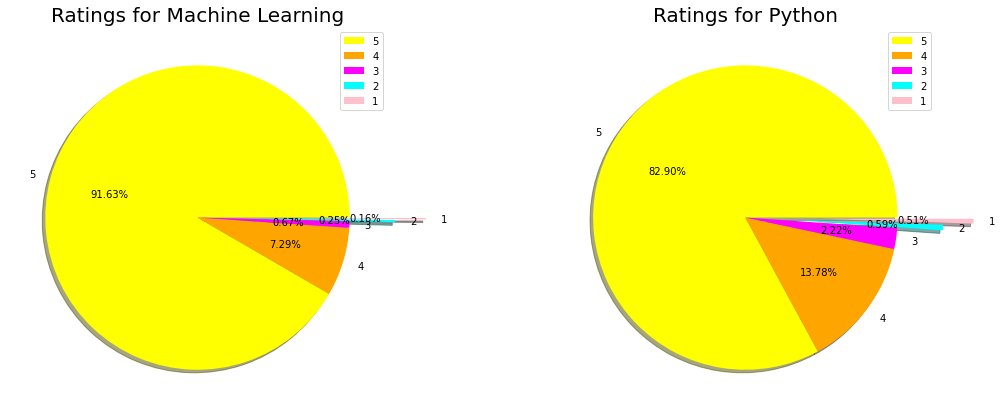

In [29]:
# plotting ratings of machine learning and python

#plt.rcParams['figure.figsize'] = (18, 10)

rating = reviewbycourse['Label'][reviewbycourse['CourseId'] == 'machine-learning']
plt.subplot(1, 2, 1)
rating.value_counts().plot.pie(colors = ['yellow', 'orange', 'magenta', 'cyan', 'pink'],
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Machine Learning', fontsize = 20)
plt.legend()

pyrating = reviewbycourse['Label'][reviewbycourse['CourseId'] == 'python']

plt.subplot(1, 2, 2)
pyrating.value_counts().plot.pie(colors = ['yellow', 'orange', 'magenta', 'cyan', 'pink'],
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Python', fontsize = 20)
plt.legend()
plt.show()

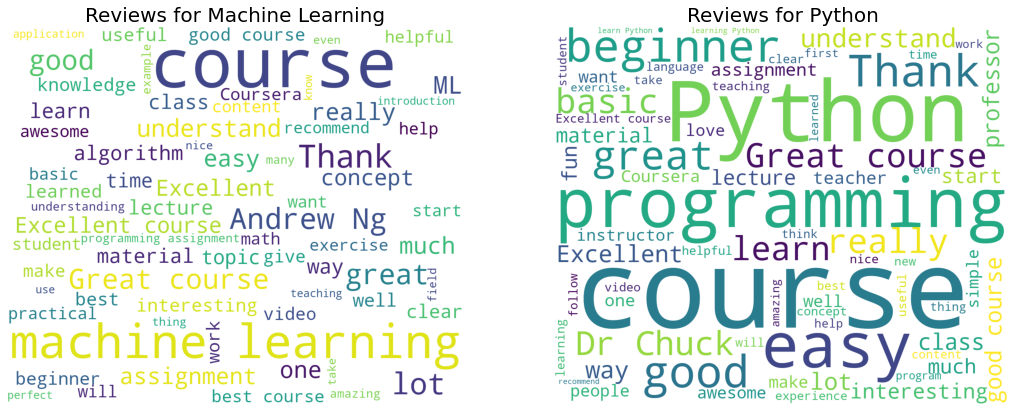

In [30]:
# let's check review for machine learning

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

mlreview = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['CourseId'] == 'machine-learning']])

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 1200, height = 1000, max_words = 70).generate(mlreview)
plt.rcParams['figure.figsize'] = (18, 7)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Machine Learning', fontsize = 20)

pyreview = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['CourseId'] == 'python']])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 1200, height = 1000, max_words = 70).generate(pyreview)
plt.rcParams['figure.figsize'] = (18, 7)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Python', fontsize = 20)

plt.show()

In [59]:
review.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [60]:
survey

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,If Select the title most similar to your curre...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
6,Or How long have you been writing code to anal...,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
7,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
9,If How do you perceive the importance of the f...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [61]:
response.head()

,Q11_OTHER_TEXT,Q12_OTHER_TEXT,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q15_OTHER_TEXT,...,Q34_OTHER_TEXT,Q35_OTHER_TEXT,Q36_OTHER_TEXT,Q37_OTHER_TEXT,Q38_OTHER_TEXT,Q42_OTHER_TEXT,Q49_OTHER_TEXT,Q50_OTHER_TEXT,Q6_OTHER_TEXT,Q7_OTHER_TEXT
0,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,...,During a typical data science project at work ...,What percentage of your current machine learni...,On which online platforms have you begun or co...,On which online platform have you spent the mo...,Who/what are your favorite media sources that ...,What metrics do you or your organization use t...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...
1,NaN,NaN,NaN,NaN,NaN,"Jupyter Notebooks, Pycharm, Intelijidea",NaN,NaN,NaN,NaN,...,0.0,NaN,mlcourse.ai,NaN,ods.ai,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,anaconda,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


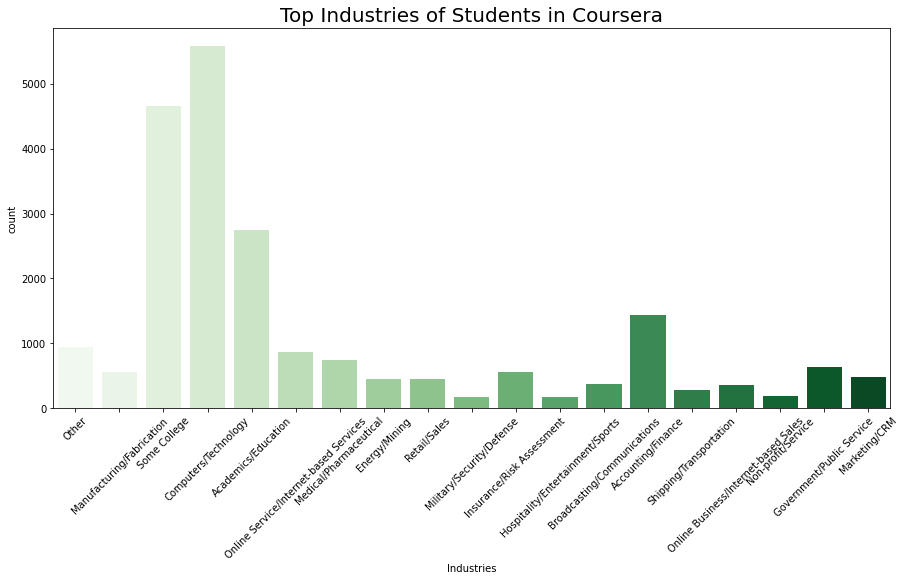

In [62]:
# data cleaning
mcresponse['Q7'].replace('In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice', 'Other', inplace = True)
mcresponse['Q7'].replace('I am a student', 'Some College', inplace = True)

# countplot

plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(mcresponse['Q7'], palette = 'Greens')
plt.title('Top Industries of Students in Coursera', fontsize = 20)
plt.xlabel('Industries')
plt.xticks(rotation = 45)
plt.show()

In [63]:
mcresponse['Q5'].value_counts()

Computer science (software engineering, etc.)                       9430
Engineering (non-computer focused)                                  3705
Mathematics or statistics                                           2950
A business discipline (accounting, economics, finance, etc.)        1791
Physics or astronomy                                                1110
Information technology, networking, or system administration        1029
Medical or life sciences (biology, chemistry, medicine, etc.)        871
Other                                                                770
Social sciences (anthropology, psychology, sociology, etc.)          554
Humanities (history, literature, philosophy, etc.)                   269
Environmental science or geology                                     253
I never declared a major                                             128
Fine arts or performing arts                                          87
Which best describes your undergraduate major? - Se

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


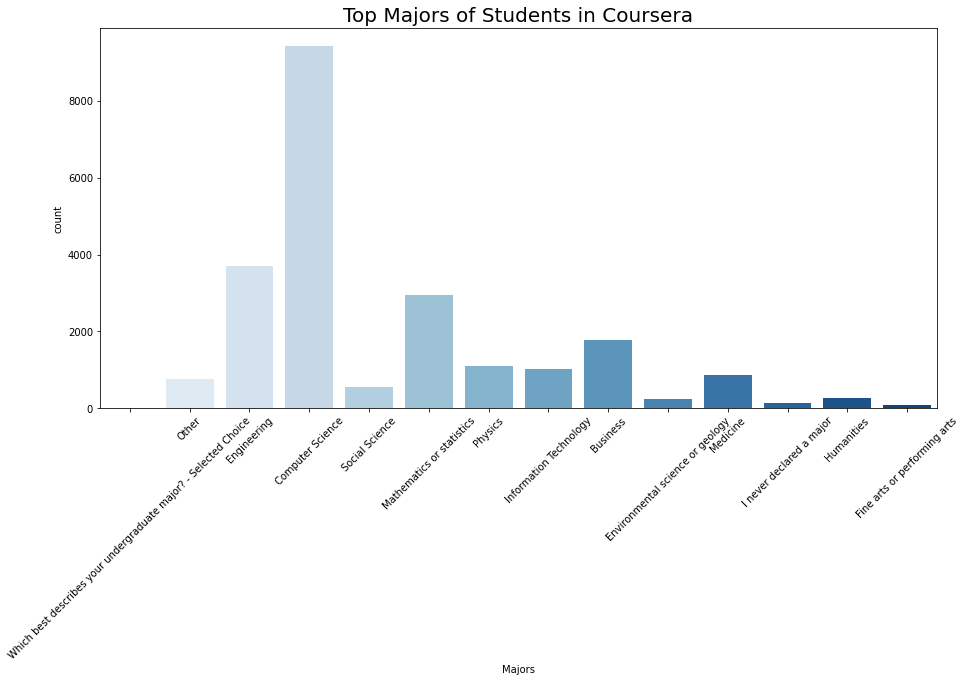

In [64]:
# data cleaning

mcresponse['Q5'].replace('Computer science (software engineering, etc.)', 'Computer Science', inplace = True)
mcresponse['Q5'].replace('Engineering (non-computer focused)', 'Engineering', inplace = True)
mcresponse['Q5'].replace('A business discipline (accounting, economics, finance, etc.)', 'Business', inplace = True)
mcresponse['Q5'].replace('Physics or astronomy', 'Physics', inplace = True)
mcresponse['Q5'].replace('Information technology, networking, or system administration', 'Information Technology', inplace = True)
mcresponse['Q5'].replace('Medical or life sciences (biology, chemistry, medicine, etc.)', 'Medicine', inplace = True)
mcresponse['Q5'].replace('Social sciences (anthropology, psychology, sociology, etc.)', 'Social Science', inplace = True)
mcresponse['Q5'].replace('Humanities (history, literature, philosophy, etc.)', 'Humanities', inplace = True)

# countplot
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(mcresponse['Q5'], palette = 'Blues')
plt.title('Top Majors of Students in Coursera', fontsize = 20)
plt.xlabel('Majors')
plt.xticks(rotation = 45)
plt.show()

In [67]:
# checking the values inside

mcresponse['Q6'].value_counts()

Student                                                                                                    5253
Data Scientist                                                                                             4137
Software Engineer                                                                                          3130
Data Analyst                                                                                               1922
Other                                                                                                      1322
Research Scientist                                                                                         1189
Not employed                                                                                                842
Consultant                                                                                                  785
Business Analyst                                                                                        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


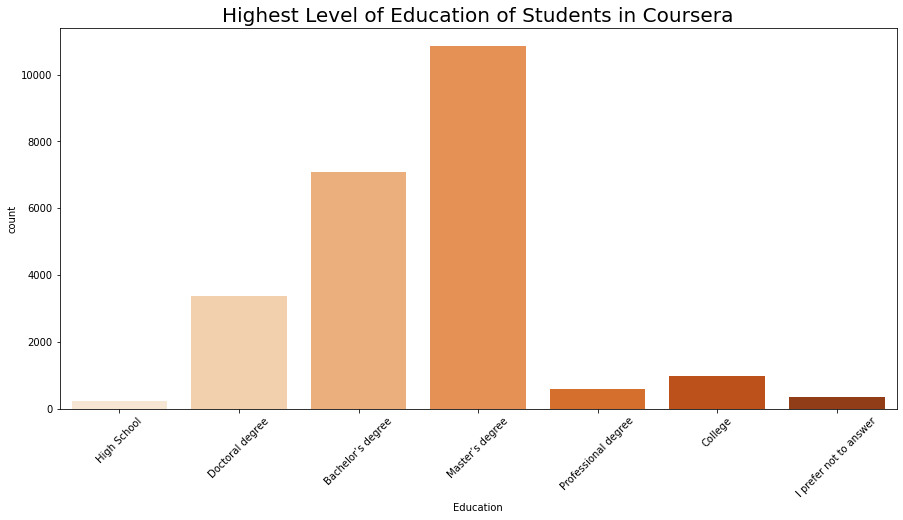

In [65]:
# data cleaning
mcresponse['Q4'].replace('No formal education past high school', 'High School', inplace = True)
mcresponse['Q4'].replace('Some college/university study without earning a bachelor’s degree', 'College', inplace = True)
mcresponse['Q4'].replace('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'High School', inplace = True)     

# countplot
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(mcresponse['Q4'], palette = 'Oranges')
plt.title('Highest Level of Education of Students in Coursera', fontsize = 20)
plt.xlabel('Education')
plt.xticks(rotation = 45)
plt.show()

In [68]:
mcresponse['Q4'].value_counts()

Master’s degree           10855
Bachelor’s degree          7083
Doctoral degree            3357
College                     967
Professional degree         599
I prefer not to answer      345
High School                 233
Name: Q4, dtype: int64

**Process we do:**

Tokenization: Split the text into sentences and the sentences into words. 
- Lowercase the words and remove punctuation.
- Words that have fewer than 3 characters are removed.
- All stopwords are removed.
- Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are stemmed — words are reduced to their root form.
- We use the NLTK and gensim libraries to perform the preprocessing

In [31]:
#Import packages
import pandas as pd
import re, string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
import gensim
from gensim import corpora
nltk.download('wordnet')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [32]:
#The function
def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

In [33]:
Final_copy['reviews']=Final_copy['reviews'].apply(str)
Final_copy = Final_copy.head(1000)

In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [36]:
Final_copy['reviews'] = Final_copy['reviews'].apply(lambda x: clean_text(x))

In [37]:
#Lemmatizer
lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text
Final_copy['reviews']= Final_copy['reviews'].apply(lambda x: lem(x))

In [38]:
#Remove all empty comments
empty_comment = Final_copy['reviews'][999]
for i in range(len(Final_copy)):
    if Final_copy['reviews'][i]==empty_comment:
        Final_copy=Final_copy.drop(i)
Final_copy=Final_copy.reset_index(drop=True)

In [39]:
#From lists of comments to a single list containing all words      
all_words=[]        
for i in range(len(Final_copy)):
    all_words = all_words + Final_copy['reviews'][i]
print(Final_copy['reviews'][0])

['extremely', 'basic', 'course', 'machine', 'learn', 'build', 'mathematics', 'yet', 'course', 'treat', 'mathematics', 'mysterious', 'monster', 'avoid', 'cost', 'unfortunately', 'leave', 'student', 'feel', 'frustrate', 'patronize', 'much', 'time', 'waste', 'video', 'arduous', 'explanation', 'triviality', 'little', 'take', 'impart', 'meaningful', 'knowledge', 'end', 'abandon', 'video', 'altogether', 'quiz', 'basic', 'largely', 'base', 'recall', 'rather', 'application', 'knowledge', 'program', 'assignment', 'nearly', 'spoonfed', 'task', 'sometimes', 'simple', 'multiply', 'two', 'matrix', 'togetherif', 'serious', 'machine', 'learn', 'comfortable', 'mathematics', 'eg', 'elementary', 'linear', 'algebra', 'probability', 'favour', 'take', 'geoff', 'hintons', 'neural', 'network', 'course', 'instead', 'far', 'interest', 'doesnt', 'shy', 'away', 'serious', 'explanation', 'mathematics', 'underlie', 'model']


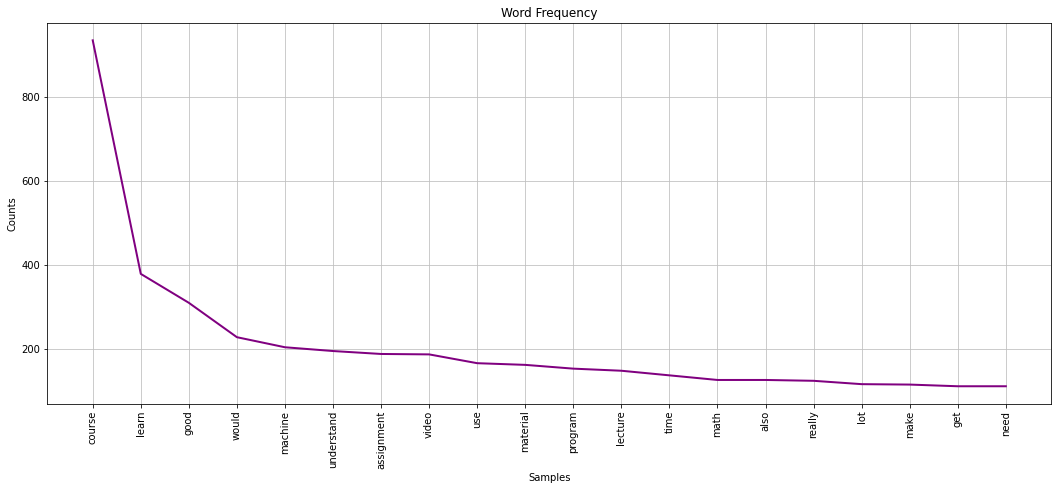

In [40]:
#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='purple', title='Word Frequency')

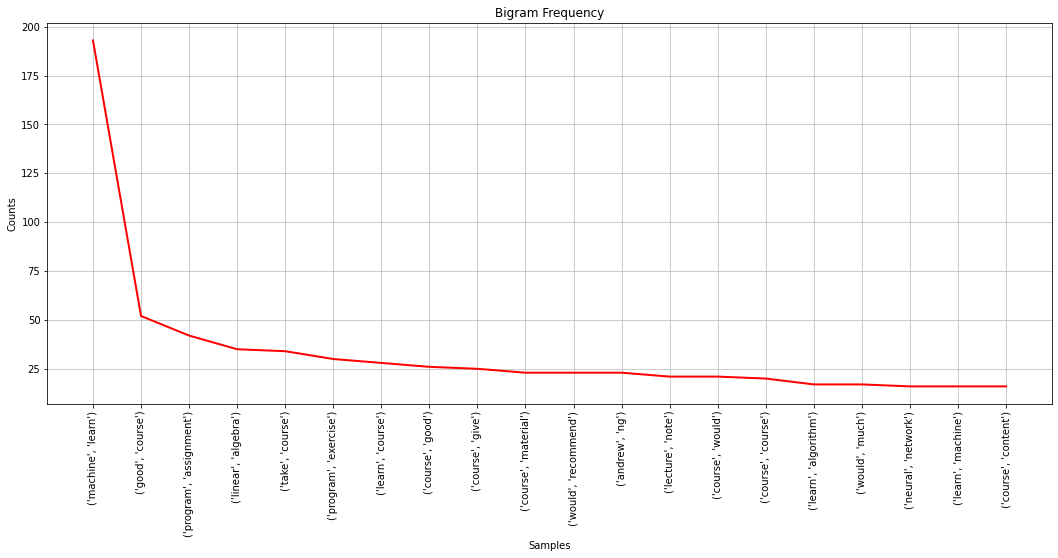

In [41]:
#Bigrams
bigrm = list(nltk.bigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='red', title='Bigram Frequency')

In [42]:
Final_copy.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_type,duration,course_language,course_rating,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[extremely, basic, course, machine, learn, bui...",By Deleted A,"Mar 18, 2017",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[course, ok, certification, procedure, messno,...",By Bruno C,"Nov 09, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[start, week, admit, good, course, explain, id...",By Fadi,"Apr 15, 2019",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[course, absolute, garbage, get, feedback, qui...",By Mathew L,"Sep 25, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"[however, good, material, lecture, may, use, o...",By Rui C,"Dec 12, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


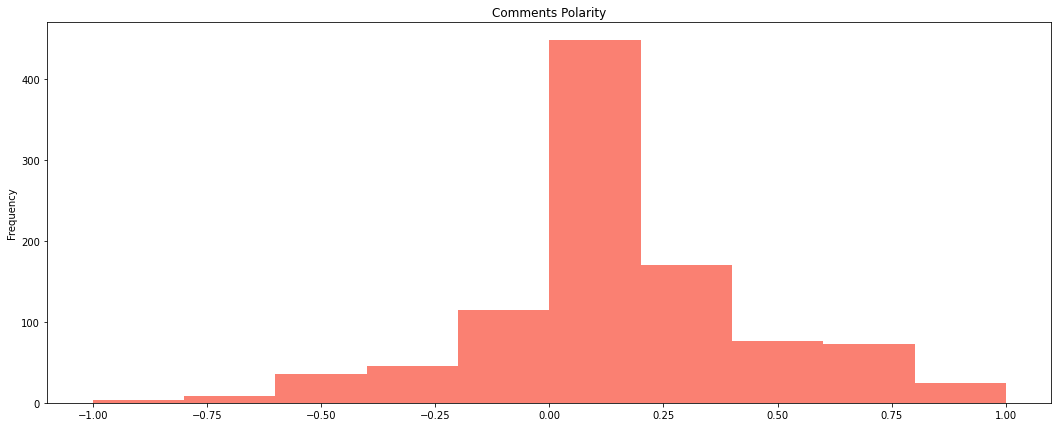

In [53]:
#Get sentiment from comments
Final_copy2 = Final_copy.copy()
Final_copy2['reviews'] = [str(thing) for thing in Final_copy2['reviews']]
sentiment = []
for i in range(len(Final_copy)):
    blob = TextBlob(Final_copy2['reviews'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
Final_copy2['reviews']=sentiment
#Plot
Final_copy2['reviews'].plot.hist(color='salmon', title='Comments Polarity')

**This chart above tells us that majority of the comments left on this course are positive.**

In [43]:
Final_copy['reviews']=Final_copy['reviews'].apply(str)
Final_copy.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_type,duration,course_language,course_rating,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['extremely', 'basic', 'course', 'machine', 'l...",By Deleted A,"Mar 18, 2017",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['course', 'ok', 'certification', 'procedure',...",By Bruno C,"Nov 09, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['start', 'week', 'admit', 'good', 'course', '...",By Fadi,"Apr 15, 2019",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['course', 'absolute', 'garbage', 'get', 'feed...",By Mathew L,"Sep 25, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['however', 'good', 'material', 'lecture', 'ma...",By Rui C,"Dec 12, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


In [44]:
tokenized_reviews = Final_copy['reviews'].apply(lambda x: x.split())
print(tokenized_reviews[10])

["['would',", "'recommend',", "'take',", "'course',", "'course',", "'show',", "'age',", "'lot',", "'concept',", "'simply',", "'doesnt',", "'apply',", "'consider',", "'fast',", "'field',", "'change']"]


In [45]:
Final_copy.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,course_type,duration,course_language,course_rating,instructor,course_detail
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['extremely', 'basic', 'course', 'machine', 'l...",By Deleted A,"Mar 18, 2017",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['course', 'ok', 'certification', 'procedure',...",By Bruno C,"Nov 09, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['start', 'week', 'admit', 'good', 'course', '...",By Fadi,"Apr 15, 2019",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['course', 'absolute', 'garbage', 'get', 'feed...",By Mathew L,"Sep 25, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"['however', 'good', 'material', 'lecture', 'ma...",By Rui C,"Dec 12, 2015",1,100% online,Approx. 60 hours to complete,English,4.9stars,"Andrew NgTop Instructor,",Machine learning is the science of getting com...


In [46]:
Final_copy['reviews']=Final_copy['reviews'].apply(str) 
x = 'Machine Learning' 
Final_copy = Final_copy[Final_copy['name']==x]

We convert the tokenized and lemmatized text to a bag of words — which you can think of as a dictionary where the key is the word and value is the number of times that word occurs in the entire corpus.

In [47]:
dictionary = corpora.Dictionary(tokenized_reviews)

Now for each pre-processed document we use the dictionary object just created to convert that document into a bag of words. i.e for each document we create a dictionary reporting how many words and how many times those words appear.

In [48]:
print(dictionary)

Dictionary(2343 unique tokens: ["'abandon',", "'algebra',", "'altogether',", "'application',", "'arduous',"]...)


In [49]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

We use the gensim lda model, we need to specify how many topics are there in the data set that we want to use.

In [50]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [51]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [52]:
lda_model.print_topics()

[(0,
  '0.048*"\'course\'," + 0.018*"\'learn\'," + 0.012*"\'octave\'," + 0.011*"\'use\'," + 0.010*"\'content\'," + 0.009*"[\'course\'," + 0.008*"\'assignment\'," + 0.008*"\'machine\'," + 0.008*"\'good\'," + 0.008*"\'apply\',"'),
 (1,
  '0.018*"\'good\'," + 0.018*"\'course\'," + 0.016*"\'machine\'," + 0.016*"\'learn\'," + 0.012*"\'would\'," + 0.008*"[\'course\'," + 0.008*"\'great\'," + 0.008*"\'really\'," + 0.008*"\'people\'," + 0.008*"\'problem\',"'),
 (2,
  '0.038*"\'course\'," + 0.012*"\'would\'," + 0.011*"\'understand\'," + 0.009*"\'learn\'," + 0.009*"\'material\'," + 0.008*"\'machine\'," + 0.008*"\'work\'," + 0.007*"\'time\'," + 0.007*"\'ml\'," + 0.007*"\'also\',"'),
 (3,
  '0.029*"\'course\'," + 0.019*"\'learn\'," + 0.015*"\'assignment\'," + 0.012*"\'machine\'," + 0.010*"[\'good\'," + 0.009*"\'program\'," + 0.008*"\'line\'," + 0.008*"\'confuse\'," + 0.008*"\'take\'," + 0.008*"\'would\',"'),
 (4,
  '0.024*"\'course\'," + 0.013*"\'learn\'," + 0.011*"\'material\'," + 0.011*"\'lot\',"

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
documents = Final_copy['reviews']

In [56]:
# raw documents to tf-idf matrix: 
vectorizer = TfidfVectorizer(stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=10)
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
svd_matrix = svd_transformer.fit_transform(documents)

# svd_matrix can later be used to compare documents, compare words, or compare queries with documents
svd_matrix

array([[ 0.18929718, -0.19820636,  0.02927353, ...,  0.11144669,
         0.04033698, -0.01358474],
       [ 0.07053185, -0.06701484, -0.0104453 , ...,  0.09227279,
        -0.04660635,  0.06304111],
       [ 0.27194765, -0.1592001 , -0.00184436, ...,  0.02473168,
        -0.07450862,  0.10058805],
       ...,
       [ 0.07262079, -0.05616205, -0.00439043, ..., -0.03265544,
        -0.02626265, -0.01178813],
       [ 0.2174878 , -0.19503359, -0.08527518, ...,  0.06294389,
        -0.00466752, -0.01510154],
       [ 0.13438755, -0.16762675, -0.13403748, ..., -0.0474987 ,
         0.0091171 , -0.0313504 ]])

**LDA**

**Why we prefer using LDA?**

For **(1)**, you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For **(2)**, exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [57]:
# Visualize the topics
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=49e72f60c76cb785123e89342e52688cf32ab0bb174c1a16b5ddb468d78a3c2a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=863adf84ad01b11de43245b8d01c06837271268ba10e3d4c0bce27f3b8e2d128
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.033941 -0.001043       1        1  22.416661
0     -0.034114 -0.033526       2        1  17.921218
6      0.019719 -0.022036       3        1  16.459027
3     -0.076417 -0.084214       4        1  14.747855
1     -0.051015 -0.035982       5        1  12.416375
4     -0.029535  0.192956       6        1   8.520072
5      0.205302 -0.016155       7        1   7.518793, topic_info=               Term        Freq       Total Category  logprob  loglift
168       'octave',   70.000000   70.000000  Default  30.0000  30.0000
128      'lecture',  128.000000  128.000000  Default  29.0000  29.0000
40          'much',   89.000000   89.000000  Default  28.0000  28.0000
188      'content',   50.000000   50.000000  Default  27.0000  27.0000
2295       ['good']   18.000000   18.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
250   'background',    7.768114   49.970152   Topic7  -5.3556   0.7264
49          'quiz',    8.060632   72.043690   Topic7  -5.3186   0.3975
728         'part',    7.770079   56.343864   Topic7  -5.3553   0.6066
9          'basic',    7.769981   63.720849   Topic7  -5.3553   0.4835
129         'math',    7.769977  105.337233   Topic7  -5.3553  -0.0191

[540 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1501      1  0.863495     'ability',
364       3  0.872897  'absolutely',
246       1  0.217298    'actually',
246       3  0.217298    'actually',
246       4  0.108649    'actually',
...     ...       ...            ...
245       2  0.161669      ['would',
245       4  0.323337      ['would',
245       5  0.161669      ['would',
245       6  0.377227      ['would',
356       1  0.922888             []

[1028 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 7, 4, 2, 5, 6])

**SENTIMENT ANALYSIS**

In [72]:
mcresponse['Q1'].value_counts()

Male                 19430
Female                4010
Prefer not to say      420
Name: Q1, dtype: int64

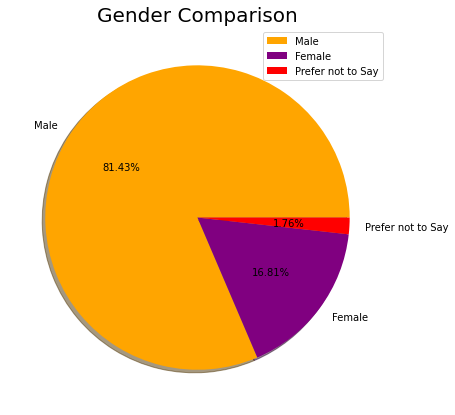

In [70]:
mcresponse['Q1'].replace('Prefer to self-describe', 'Prefer not to say', inplace = True)
mcresponse['Q1'].replace('What is your gender? - Selected Choice', 'Prefer not to say', inplace = True)

mcresponse['Q1'].value_counts().plot.pie(colors = ['orange', 'purple', 'red'],
                                        labels = ['Male', 'Female', 'Prefer not to Say'],
                                        autopct = '%.2f%%',
                                        shadow = True)
plt.rcParams['figure.figsize'] = (9, 9)
plt.legend()
plt.axis('off')
plt.title('Gender Comparison', fontsize = 20)
plt.show()

Popularity of Coursera in various countries from where reviews were collected from.

Text(0.5, 1.0, 'Top Countries Where Coursera is Popular')

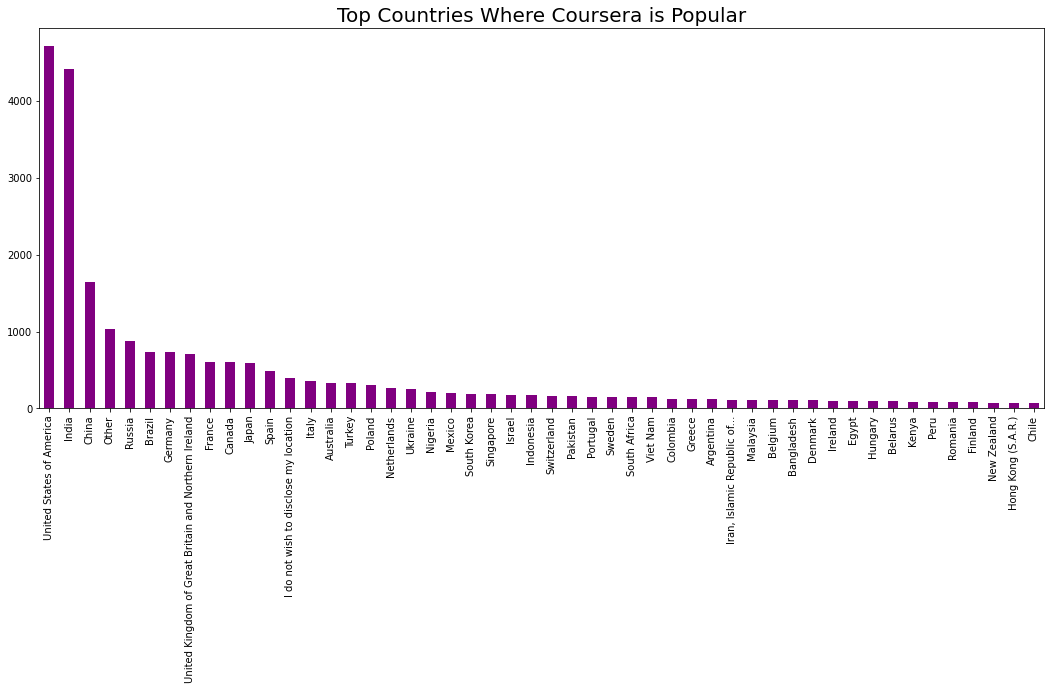

In [79]:
# top countries where coursera is popular

mcresponse['Q3'].value_counts().head(50).plot.bar(figsize = (18, 7), color = 'purple')
plt.title('Top Countries Where Coursera is Popular', fontsize = 20)

In [81]:
# describing the review by course

reviewbycourse.describe()

,Label
count,140320.000000
mean,4.619185
std,0.821347
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


**LABELS FOR THE DATASETS**

For a 5-star rating, the review was labelled as Very Positive, Positive for 4-star, Neutral for 3-star, Negative for 2-star, and Very Negative for 1-star. 

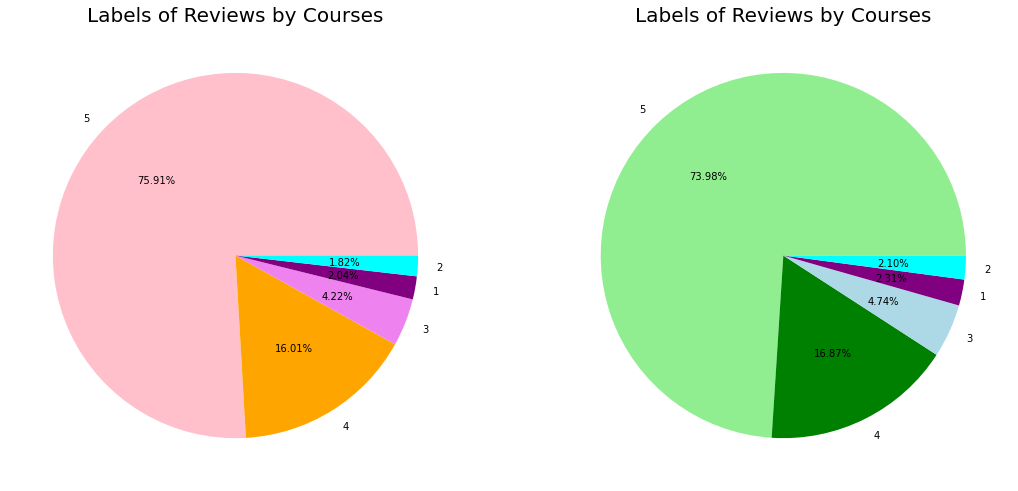

In [83]:
# checking different labels for reviews in reviews by courses

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
reviewbycourse['Label'].value_counts().plot.pie(colors = ['pink', 'orange', 'violet', 'purple', 'cyan'], labels = ["5", "4", "3", "1", "2"], autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses', fontsize = 20)

plt.subplot(1, 2, 2)
review['Label'].value_counts().plot.pie(colors = ['lightgreen', 'green', 'lightblue', 'purple', 'cyan'], labels = ["5", "4", "3", "1", "2"], autopct = '%.2f%%')
plt.axis('off')
plt.title('Labels of Reviews by Courses', fontsize = 20)

plt.show()

**WORD CLOUD 1 & 2**

To decide the sentiments of the users who reviewed the course, and then classifying the reviews into positive and negative.

Text(0.5, 1.0, 'Most Frequent Words for Reviews')

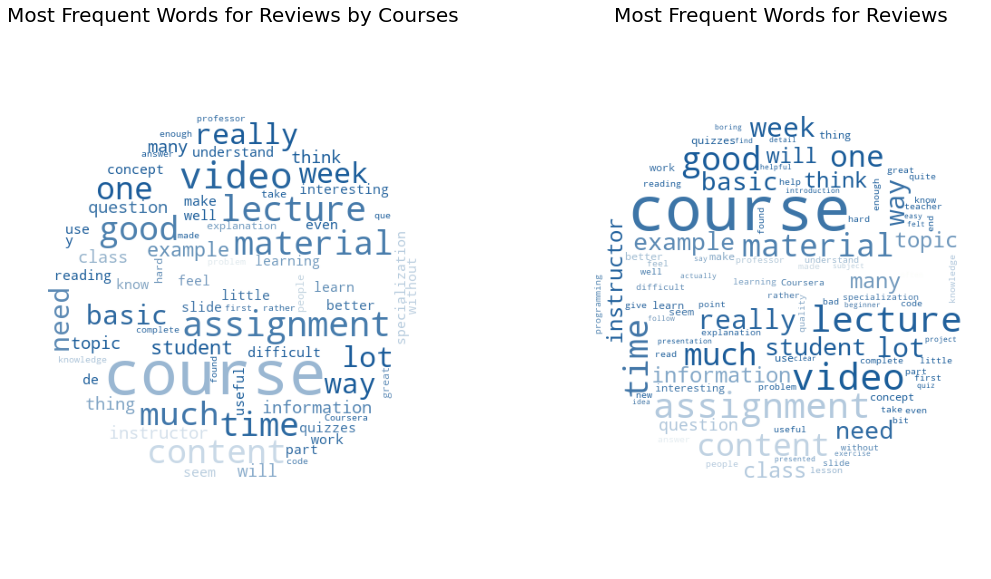

In [99]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 2]])

mask = np.array(Image.open('courseraa.jpg'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 2]])
mask = np.array(Image.open('courseraa.jpg'))
wordcloud = WordCloud(background_color = 'white', max_words = 100, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20)


Text(0.5, 1.0, 'Most Frequent Words for Reviews')

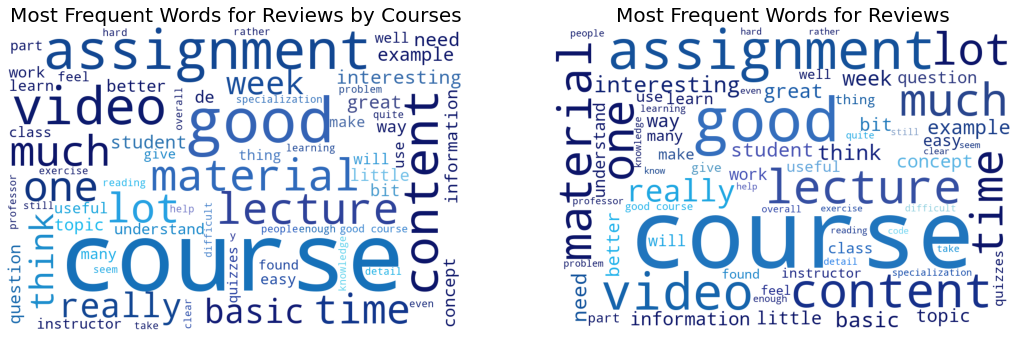

In [107]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator

plt.rcParams['figure.figsize'] = (18, 10)

plt.subplot(1, 2, 1)
label1 = ' '.join([text for text in reviewbycourse['Review'][reviewbycourse['Label'] == 3]])

mask = np.array(Image.open('nlp2.png'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews by Courses', fontsize = 20)

plt.subplot(1, 2, 2)

label1 = ' '.join([text for text in review['Review'][review['Label'] == 3]])
mask = np.array(Image.open('nlp2.png'))
wordcloud = WordCloud(background_color = 'white', max_words = 70, mask = mask).generate(label1)
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis('off')
plt.title('Most Frequent Words for Reviews', fontsize = 20)
